In [1]:
from pymoo.algorithms.soo.nonconvex.ga import GA
from pymoo.operators.crossover.sbx import SBX
from pymoo.operators.mutation.pm import PM
from pymoo.util.remote import Remote

from pymoo.problems import get_problem
from pymoo.optimize import minimize
from pymoo.core.problem import Problem
from pymoo.operators.sampling.rnd import FloatRandomSampling,IntegerRandomSampling
from pymoo.operators.repair.rounding import RoundingRepair

import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import pandas as pd
import numpy as np
import yfinance as yf
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.preprocessing import MinMaxScaler
import time
import matplotlib.pyplot as plt
import math
import copy
from concurrent.futures import ThreadPoolExecutor
from concurrent.futures import ProcessPoolExecutor
from tensorflow.keras.layers import Input
from sklearn.preprocessing import StandardScaler
from keras.layers import Dropout

In [2]:
# Criptomoedas que vamos escolher para nosso portifólio
cryptos = [
    'BTC-USD', 'ETH-USD','LTC-USD', 'ADA-USD',
    'DOT-USD', 'LINK-USD','SOL-USD',
    'TRX-USD'
]

In [3]:
data_visual = {}
for crypto in cryptos:
    data_visual[crypto] = pd.read_csv(f"{crypto}.csv", index_col='Date')
    data_visual[crypto] = data_visual[crypto][~data_visual[crypto].index.duplicated(keep='first')]

In [4]:
data_visual['BTC-USD'].dropna()

,Crypto_Return_Today,exp_value
Date,,
2019-08-19,0.053221,0.001273
2019-08-20,-0.014125,0.008775
2019-08-21,-0.059965,0.002337
2019-08-22,-0.001131,-0.003666
2019-08-23,0.026447,0.003975
...,...,...
2024-10-16,0.008470,0.003743
2024-10-17,-0.003218,-0.000829
2024-10-18,0.014719,0.006106


0.008 representa o 5% maiores valores de exp_value preditos

In [5]:
for crypto in cryptos:
    df = data_visual[crypto]
    df['ae'] = df['exp_value'] - df['Crypto_Return_Today']
    df['ae'] = abs(df['ae'])
    df = df.dropna()
    num_positive = (df['Crypto_Return_Today'] > 0).sum()
    num_negative = (df['Crypto_Return_Today'] < 0).sum()

    hat_pos = (df['exp_value'] > 0).sum()
    hat_neg = (df['exp_value'] < 0).sum()


    TP = ((df['Crypto_Return_Today'] > 0)  & (df['exp_value'] > 0)).sum()
    TN = ((df['Crypto_Return_Today'] < 0)  & (df['exp_value'] < 0)).sum()
    FP = ((df['Crypto_Return_Today'] < 0)  & (df['exp_value'] > 0)).sum()
    FN = ((df['Crypto_Return_Today'] > 0)  & (df['exp_value'] < 0)).sum()

    #rmse = np.sqrt(((df['Crypto_Return_Today'] - df['exp_value']) ** 2).mean())
    print("\n\n--------------------------------------------------------")
    print("\n\nCriptomoeda: ", crypto)
    print("\n                              Real")
    print("\nNumero de Subidas: ",num_positive,"   |   ",100*num_positive / (num_negative + num_positive),"%")
    print("\nNumero de Quedas : ",num_negative,"   |   ",100*num_negative / (num_negative + num_positive),"%")

    print("\n                              Predito")
    print("\nNumero de Subidas: ",hat_pos,"   |   ", 100*hat_pos / (hat_neg + hat_pos),"%")
    print("\nNumero de Quedas : ",hat_neg,"   |   ", 100*hat_neg / (hat_neg + hat_pos),"%")

    print("\nMean Absolute Error MAE: ", df['ae'].mean())
    #print("\nRoot Mean Squared Error RMSE: ", rmse)
    print("\nAcc: ", (TP+TN) / (TP + FP + FN + FP))
    print("\nSen: ", (TP) / (TP + FN)) # significa, entre os que subiram, quantos % eu consegui identificar que realmente subiu
    print("\nSpe: ", (TP) / (TP + FN)) # significa, entre os que cairam, quantos % eu consegui identificar que realmente caiu
    print("\nPre: ", (TP) / (TP + FP)) # significa, entre os que eu disse que ia subir, quantos % realmente subiram

    TP = ((df['Crypto_Return_Today'] > 0)  & (df['exp_value'] > 0) & (df['exp_value'] >= 0.008)).sum()
    FP = (((df['Crypto_Return_Today'] < 0)  & (df['exp_value'] > 0)) & (df['exp_value'] >= 0.008)).sum()

    limite_90 = df['exp_value'].quantile(0.9)
    menor_valor_10_maiores = df[df['exp_value'] >= limite_90]['exp_value'].min()
    print("\nLower bound dos 10% maiores: ", menor_valor_10_maiores)
    print("\nPrecisao para maiores que 0.008: ", (TP) / (TP + FP)) # significa, entre os que eu disse que ia subir, quantos % realmente subiram



--------------------------------------------------------


Criptomoeda:  BTC-USD

                              Real

Numero de Subidas:  957    |    50.63492063492063 %

Numero de Quedas :  933    |    49.36507936507937 %

                              Predito

Numero de Subidas:  1063    |    56.24338624338624 %

Numero de Quedas :  827    |    43.75661375661376 %

Mean Absolute Error MAE:  0.022929531972738317

Acc:  0.49822425164890916

Sen:  0.58098223615465

Spe:  0.58098223615465

Pre:  0.5230479774223895

Lower bound dos 10% maiores:  0.0081897368654608

Precisao para maiores que 0.008:  0.5707070707070707


--------------------------------------------------------


Criptomoeda:  ETH-USD

                              Real

Numero de Subidas:  974    |    51.53439153439153 %

Numero de Quedas :  916    |    48.46560846560847 %

                              Predito

Numero de Subidas:  1081    |    57.195767195767196 %

Numero de Quedas :  809    |    42.804232804232804 %

Me

---

Criptomoeda:  BTC-USD

                              Real

Numero de Subidas:  957    |    50.63492063492063 %

Numero de Quedas :  933    |    49.36507936507937 %

                              Predito

Numero de Subidas:  1063    |    56.24338624338624 %

Numero de Quedas :  827    |    43.75661375661376 %

Mean Absolute Error MAE:  0.022929531972738317

Acc:  0.49822425164890916

Sen:  0.58098223615465

Spe:  0.58098223615465

Pre:  0.5230479774223895

Lower bound dos 10% maiores:  0.0081897368654608

Precisao para maiores que 0.008:  0.5707070707070707


--------------------------------------------------------


Criptomoeda:  ETH-USD

                              Real

Numero de Subidas:  974    |    51.53439153439153 %

Numero de Quedas :  916    |    48.46560846560847 %

                              Predito

Numero de Subidas:  1081    |    57.195767195767196 %

Numero de Quedas :  809    |    42.804232804232804 %

Mean Absolute Error MAE:  0.02967418686373406

Acc:  0.4855

Sen:  0.5831622176591376

Spe:  0.5831622176591376

Pre:  0.5254394079555966

Lower bound dos 10% maiores:  0.0101016396656632

Precisao para maiores que 0.008:  0.5390070921985816


--------------------------------------------------------


Criptomoeda:  LTC-USD

                              Real

Numero de Subidas:  973    |    51.48148148148148 %

Numero de Quedas :  917    |    48.51851851851852 %

                              Predito

Numero de Subidas:  921    |    48.73015873015873 %

Numero de Quedas :  969    |    51.26984126984127 %

Mean Absolute Error MAE:  0.031932366817318245

Acc:  0.5121032813340506

Sen:  0.49126413155190135

Spe:  0.49126413155190135

Pre:  0.5190010857763301

Lower bound dos 10% maiores:  0.0085870809853076

Precisao para maiores que 0.008:  0.5260663507109005


--------------------------------------------------------


Criptomoeda:  ADA-USD

                              Real

Numero de Subidas:  958    |    50.714663843303335 %

Numero de Quedas :  931    |    49.285336156696665 %

                              Predito

Numero de Subidas:  904    |    47.83068783068783 %

Numero de Quedas :  986    |    52.16931216931217 %

Mean Absolute Error MAE:  0.03500963619803125

Acc:  0.53125

Sen:  0.49164926931106473

Spe:  0.49164926931106473

Pre:  0.5210176991150443

Lower bound dos 10% maiores:  0.0135052315890789

Precisao para maiores que 0.008:  0.5176151761517616


--------------------------------------------------------


Criptomoeda:  DOT-USD

                              Real

Numero de Subidas:  720    |    49.930651872399444 %

Numero de Quedas :  722    |    50.069348127600556 %

                              Predito

Numero de Subidas:  640    |    44.382801664355064 %

Numero de Quedas :  802    |    55.617198335644936 %

Mean Absolute Error MAE:  0.03690660648679021

Acc:  0.5583832335329342

Sen:  0.46111111111111114

Spe:  0.46111111111111114

Pre:  0.51875

Lower bound dos 10% maiores:  0.0124539732933044

Precisao para maiores que 0.008:  0.5


--------------------------------------------------------


Criptomoeda:  LINK-USD

                              Real

Numero de Subidas:  979    |    51.7989417989418 %

Numero de Quedas :  911    |    48.2010582010582 %

                              Predito

Numero de Subidas:  1012    |    53.544973544973544 %

Numero de Quedas :  878    |    46.455026455026456 %

Mean Absolute Error MAE:  0.039988347630485935

Acc:  0.46788062721294893

Sen:  0.5240040858018387

Spe:  0.5240040858018387

Pre:  0.5069169960474308

Lower bound dos 10% maiores:  0.0125243719667196

Precisao para maiores que 0.008:  0.486646884272997


--------------------------------------------------------


Criptomoeda:  SOL-USD

                              Real

Numero de Subidas:  789    |    50.12706480304956 %

Numero de Quedas :  785    |    49.87293519695044 %

                              Predito

Numero de Subidas:  890    |    56.5438373570521 %

Numero de Quedas :  684    |    43.4561626429479 %

Mean Absolute Error MAE:  0.047768711905629126

Acc:  0.5033557046979866

Sen:  0.5893536121673004

Spe:  0.5893536121673004

Pre:  0.5224719101123596

Lower bound dos 10% maiores:  0.0218559987843036

Precisao para maiores que 0.008:  0.530241935483871


--------------------------------------------------------


Criptomoeda:  TRX-USD

                              Real

Numero de Subidas:  1020    |    53.99682371625199 %

Numero de Quedas :  869    |    46.00317628374801 %

                              Predito

Numero de Subidas:  1109    |    58.67724867724868 %

Numero de Quedas :  781    |    41.32275132275132 %

Mean Absolute Error MAE:  0.027583704712704767

Acc:  0.4807312252964427

Sen:  0.5941176470588235

Spe:  0.5941176470588235

Pre:  0.5469314079422383

Lower bound dos 10% maiores:  0.007676844485104

Precisao para maiores que 0.008:  0.5058139534883721

In [6]:
df = data_visual['ETH-USD']
df['ae'] = df['exp_value'] - df['Crypto_Return_Today']
df['ae'] = abs(df['ae'])

In [7]:
df['mae'] = df['ae'].rolling(window = 60).mean()

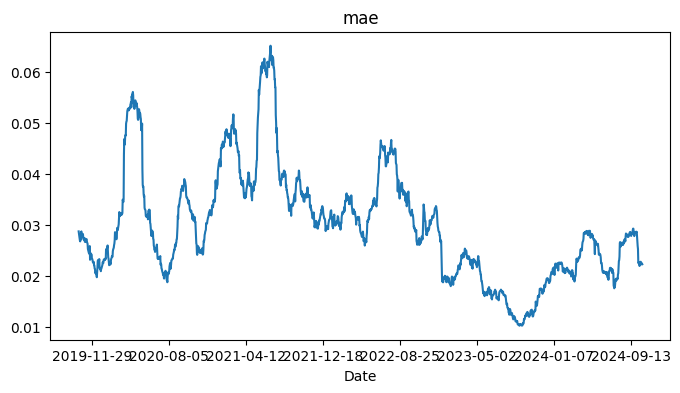

In [8]:
from matplotlib import pyplot as plt
df['mae'].plot(kind='line', figsize=(8, 4), title='mae')
plt.gca().spines[['top', 'right']].set_visible(True)

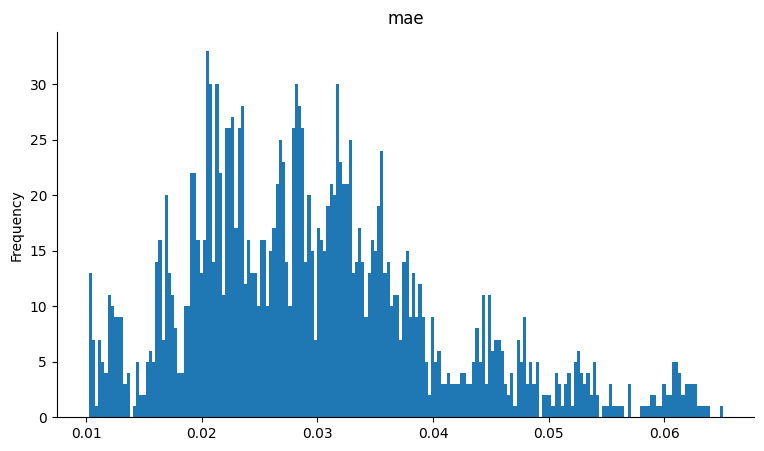

In [9]:
from matplotlib import pyplot as plt
df['mae'].plot(kind='hist', figsize=(9, 5), bins=200, title='mae')
plt.gca().spines[['top', 'right',]].set_visible(False)

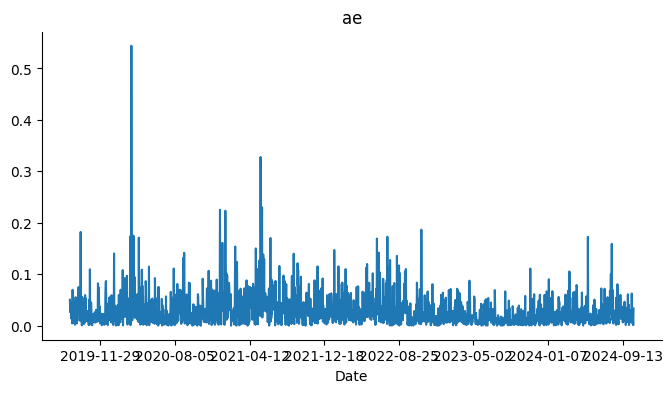

In [10]:
from matplotlib import pyplot as plt
df['ae'].plot(kind='line', figsize=(8, 4), title='ae')
plt.gca().spines[['top', 'right']].set_visible(False)

### **Vamos criar data2**
#### Este será um dicionário que lê os csv's salvos e os armazena para cada criptomoeda

In [11]:
data2 = {}
for crypto in cryptos:
    data2[crypto] = pd.read_csv(f"{crypto}.csv", index_col='Date')
    data2[crypto] = data2[crypto][~data2[crypto].index.duplicated(keep='first')]
    #data_complete[crypto] = pd.read_csv(f"{crypto}.csv")

In [12]:
for crypto in cryptos:
    print(len(data2[crypto]))
    data2[crypto] = data2[crypto]


2983
2538
2983
2538
1523
2538
1655
2538


In [13]:
data2['BTC-USD']

,Crypto_Return_Today,exp_value
Date,,
2016-08-21,-0.001085,NaN
2016-08-22,0.009318,NaN
2016-08-23,-0.005736,NaN
2016-08-24,-0.005552,NaN
2016-08-25,-0.004178,NaN
...,...,...
2024-10-16,0.008470,0.003743
2024-10-17,-0.003218,-0.000829
2024-10-18,0.014719,0.006106


### **Vamos criar data_mus**
#### Este será um DataFrame que cada linha representa uma sample, e cada coluna representa o valor esperado de um dos ativos de nosso portifólio.

In [14]:
data_mus = pd.DataFrame()
for crypto in cryptos:
    data_mus = pd.merge(data_mus, data2[crypto]['exp_value'], left_index=True, right_index=True, how='outer', suffixes=('', crypto))
    data_mus = data_mus.rename(columns={f'exp_value{crypto}': crypto})

In [15]:
#data_mus.fillna(0, inplace=True)
data_mus = data_mus.rename(columns={'exp_value': 'BTC-USD'})
data_mus.dropna(how = 'all')

,BTC-USD,ETH-USD,LTC-USD,ADA-USD,DOT-USD,LINK-USD,SOL-USD,TRX-USD
Date,,,,,,,,
2019-08-19,0.001273,-0.007609,-0.006464,-0.003234,NaN,0.007167,NaN,-0.012922
2019-08-20,0.008775,-0.004716,-0.009995,-0.015720,NaN,0.006759,NaN,-0.006782
2019-08-21,0.002337,-0.004268,-0.007131,-0.010881,NaN,-0.002865,NaN,-0.010243
2019-08-22,-0.003666,-0.005323,-0.017400,-0.007142,NaN,0.006110,NaN,-0.013654
2019-08-23,0.003975,-0.003538,-0.006715,-0.005585,NaN,0.020038,NaN,-0.009513
...,...,...,...,...,...,...,...,...
2024-10-16,0.003743,0.009319,0.009478,0.000991,0.002552,0.002543,0.005475,0.004135
2024-10-17,-0.000829,0.001030,-0.003648,0.000392,0.000020,-0.000362,0.002275,0.001567
2024-10-18,0.006106,0.000691,0.003061,0.002838,0.004308,0.003416,0.000949,0.001356


### **Vamos criar data_reals**
#### Este será um DataFrame que cada linha representa uma sample, e cada coluna representa o valor real de um dos ativos de nosso portifólio.

In [16]:
data_reals = pd.DataFrame()
for crypto in cryptos:
    data_reals = pd.merge(data_reals, data2[crypto]['Crypto_Return_Today'], left_index=True, right_index=True, how='outer', suffixes=('', crypto))
    data_reals = data_reals.rename(columns={f'Crypto_Return_Today{crypto}': crypto})

In [17]:
data_reals = data_reals.rename(columns={'Crypto_Return_Today': 'BTC-USD'})
data_reals

,BTC-USD,ETH-USD,LTC-USD,ADA-USD,DOT-USD,LINK-USD,SOL-USD,TRX-USD
Date,,,,,,,,
2016-08-21,-0.001085,NaN,-0.001200,NaN,NaN,NaN,NaN,NaN
2016-08-22,0.009318,NaN,0.010953,NaN,NaN,NaN,NaN,NaN
2016-08-23,-0.005736,NaN,0.070155,NaN,NaN,NaN,NaN,NaN
2016-08-24,-0.005552,NaN,-0.018953,NaN,NaN,NaN,NaN,NaN
2016-08-25,-0.004178,NaN,-0.014212,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
2024-10-16,0.008470,0.001948,-0.011386,-0.016882,-0.019825,-0.017466,-0.003149,0.007900
2024-10-17,-0.003218,-0.002653,0.037386,-0.027303,-0.030039,-0.019495,-0.025758,-0.004309
2024-10-18,0.014719,0.014005,0.005285,0.022151,0.027627,0.040463,0.030485,-0.005173


### **Vamos criar  mus e reals e covs**
#### mus será um dicionário, cujas chaves são as datas que compõe o index de data_mus, e cada item é um numpy array de 8 elementos (representando as criptomoedas) e 1 ultimo elemento representando o RFR
#### reals será um dicionário cujas chaves são as datas que compõe do index de data_mus, e cada item é um np array de 8 elementos (representando as criptomoedas) e 1 ultimo elemento representando o RFR
##### *Importante!* - Vamos fazer de tal modo que, para os arrays com valores NaN, nós removemos ele do portifólio

In [18]:
covs = {}
mus = {}
reals = {}

for i in range(100, data_mus.shape[0], 1):
    if(i < 200):
        df1 = data_reals[0:i] # Tabela que vai me ajudar a criar a matriz de covariância
        df2 = data_mus[i:i+1] # de onde vou coletar o previsto
        df3 = data_reals[i:i+1] # de onde vou coletar o real
    else:
        df1 = data_reals[i-200:i] # Tabela que vai me ajudar a criar a matriz de covariância
        df2 = data_mus[i:i+1]
        df3 = data_reals[i:i+1] # de onde vou coletar o real
        
    cols_with_nan_in_df2 = df2.isna().any()
    # Remover do df1 as colunas que possuem NaN em df2
    df1_cleaned = df1.drop(columns=df1.columns[cols_with_nan_in_df2])
    df2_cleaned = df2.dropna(axis=1)
    df3_cleaned = df3.drop(columns=df1.columns[cols_with_nan_in_df2])
    # Remover do df2 as colunas que possuem 60% NaN em df1
    percent_nan_df1 = df1_cleaned.isna().mean()
    cols_to_drop = percent_nan_df1[percent_nan_df1 >= 0.6].index
    df1_cleaned = df1_cleaned.drop(columns=cols_to_drop, errors='ignore')
    df2_cleaned = df2_cleaned.drop(columns=cols_to_drop, errors='ignore')
    df3_cleaned = df3_cleaned.drop(columns=cols_to_drop, errors='ignore')

    date = data_mus.index[i]
    covs[date] = df1_cleaned.cov()
    mus[date] = df2_cleaned
    reals[date] = df3_cleaned


covs[date]
mus[date]
reals[date]


São todos dataframes

pra retirar o valor de mus e reals basta fazer um .to_numpy().flatten()

In [19]:
"""covs = {}
for i in range(100, data_mus.shape[0], 1):
    df = pd.DataFrame()
    if(i < 200):
        df = data_reals_with_RFR.iloc[0: i].dropna(axis = 1)
    else:
        df = data_reals_with_RFR.iloc[i-200: i].dropna(axis = 1)
    date = data_reals_with_RFR.index[i]

    covs[date] = df.cov().to_numpy()"""

'covs = {}\nfor i in range(100, data_mus.shape[0], 1):\n    df = pd.DataFrame()\n    if(i < 200):\n        df = data_reals_with_RFR.iloc[0: i].dropna(axis = 1)\n    else:\n        df = data_reals_with_RFR.iloc[i-200: i].dropna(axis = 1)\n    date = data_reals_with_RFR.index[i]\n\n    covs[date] = df.cov().to_numpy()'

In [20]:
"""reals = {}
mus = {}

for i in range(100, data_mus.shape[0], 1):
    date = data_reals_with_RFR.index[i]
    
    for crypto in cryptos:
        if date in data2[crypto].index:
            if data2[crypto].
            reals[date] = np.append(reals[date], 1)"""

'reals = {}\nmus = {}\n\nfor i in range(100, data_mus.shape[0], 1):\n    date = data_reals_with_RFR.index[i]\n    \n    for crypto in cryptos:\n        if date in data2[crypto].index:\n            if data2[crypto].\n            reals[date] = np.append(reals[date], 1)'

In [21]:
"""reals = {}
mus = {} # mus[date] será um numpy array de K elementos
for i in range(data_mus.shape[0]):
    date = data_mus.index[i]

    mus[date] = data_mus.iloc[i].to_numpy()
    reals[date] = data_reals.iloc[i].to_numpy()

    
    reals[date] = reals[date][~np.isnan(mus[date])]
    mus[date] = mus[date][~np.isnan(mus[date])]

    mus[date] = np.exp(mus[date]) - 1
    reals[date] = np.exp(reals[date]) - 1

    reals[date] = np.append(reals[date], 0.00031)
    mus[date] = np.append(mus[date], 0.00031)"""

'reals = {}\nmus = {} # mus[date] será um numpy array de K elementos\nfor i in range(data_mus.shape[0]):\n    date = data_mus.index[i]\n\n    mus[date] = data_mus.iloc[i].to_numpy()\n    reals[date] = data_reals.iloc[i].to_numpy()\n\n    \n    reals[date] = reals[date][~np.isnan(mus[date])]\n    mus[date] = mus[date][~np.isnan(mus[date])]\n\n    mus[date] = np.exp(mus[date]) - 1\n    reals[date] = np.exp(reals[date]) - 1\n\n    reals[date] = np.append(reals[date], 0.00031)\n    mus[date] = np.append(mus[date], 0.00031)'

In [22]:
"""reals = {} # mus[date] será um numpy array de 8 elementos
for i in range(data_reals.shape[0]):
    date = data_reals.index[i]
    reals[date] = data_reals.iloc[i].to_numpy()
    reals[date] = reals[date][~np.isnan(reals[date])]
    reals[date] = np.append(reals[date], 0.002)"""

'reals = {} # mus[date] será um numpy array de 8 elementos\nfor i in range(data_reals.shape[0]):\n    date = data_reals.index[i]\n    reals[date] = data_reals.iloc[i].to_numpy()\n    reals[date] = reals[date][~np.isnan(reals[date])]\n    reals[date] = np.append(reals[date], 0.002)'

em cada dia: date

covs[date] é a matriz de covariancia


mus[date] é o vetor de valores preditos


reals[date] é o vetor de valores reais


isso gera um portifólio ws[date]


para esse portifólio, vamos ter como retorno percentual ws[date]*(e^mus[date] - 1) que vamos armazenar em profit[date]

In [23]:
from pymoo.core.problem import ElementwiseProblem

class PortfolioProblemGA(ElementwiseProblem):
    def __init__(self, mu, cov, risk_free_rate=0, **kwargs):
        # Problema com apenas 1 objetivo. Minimizar a função objetivo _evaluate que é sharpe * -1
        super().__init__(n_var=len(mu), n_obj=1, xl=0.0, xu=1.0, **kwargs)
        self.mu = mu
        self.cov = cov
        self.risk_free_rate = risk_free_rate

    def _evaluate(self, x, out, *args, **kwargs):
        exp_return = x @ self.mu # @ é multiplicação de matriz 
        exp_risk = np.sqrt(x.T @ self.cov @ x) 
        if exp_risk <= 0.00001:
            sharpe = 0
        else:
            sharpe = (exp_return - self.risk_free_rate) / exp_risk

        out["F"] = -sharpe #[exp_risk, -exp_return]
        # importante : Note o sinal negativo para Sharpe (queremos maximizar Sharpe), mas o pymoo esperar minimizar
        # 
        out["risk_return"] = [exp_risk, -exp_return]


from pymoo.core.repair import Repair

class PortfolioRepair(Repair): # Elimina pesos muito baixos (menores que 0.001)
    def _do(self, problem, X, **kwargs):
        X[X < 1e-3] = 0 # Seta valores menores que 0.001 (1e-3) para zero
        X=X / X.sum(axis=1, keepdims=True) # normaliza o portfolio (somatorio dos pesos igual a 1) 
        return X

In [24]:
import os
def Portfolio(mu, cov, day):
    # Solução com GA
    problem = PortfolioProblemGA(mu, cov)


    algorithm = GA(
        pop_size=100,
        crossover=SBX(prob=1.0, eta=3.0, vtype=float, repair=PortfolioRepair()), # Simulated Binary Crossover, hyperparameters: prob of crossover, eta - parameter of crossover distribution
        mutation=PM(prob=1.0, eta=3.0, vtype=float, repair=PortfolioRepair()),  
        eliminate_duplicates=True)

    res = minimize(problem, # observe que estamos minimizando
                algorithm,
                termination=('n_gen', 1000),# Criterio de termino: numero de geracoes!
                seed=1,
                verbose=False)
    
    # Apresentação dos Resultados
    #res.X: Design space values are
    #res.F: Objective spaces values

    X, F, sharpe = res.opt.get("X", "risk_return", "sharpe")
    F = F * [1, -1]
    max_sharpe = sharpe.argmax()

    plt.scatter(F[:, 0], F[:, 1], facecolor="none", edgecolors="blue", alpha=0.5, label="Pareto-Optimal Portfolio")
    plt.scatter(cov.diagonal() ** 0.5, mu, facecolor="none", edgecolors="black", s=30, label="Asset")
    plt.scatter(F[max_sharpe, 0], F[max_sharpe, 1], marker="x", s=100, color="red", label="Max Sharpe Portfolio")
    plt.legend()
    plt.xlabel("expected volatility")
    plt.ylabel("expected return")
    plt.savefig(os.path.join(save_directory, f'portfolio_plot_{day}.png'), bbox_inches='tight')
    plt.close()  # Fecha a figura para liberar memória
    import operator

    allocation = {name: w for name, w in zip(cryptos, X[max_sharpe])}

    X, F, sharpe = res.opt.get("X", "risk_return", "sharpe")
    F = F * [1, -1]
    max_sharpe = sharpe.argmax()
    
    allocation = {name: w for name, w in zip(cryptos, X[max_sharpe])}

    pesos = []
    for name, w in allocation.items():
        pesos = np.append(pesos, w)
    return pesos


In [25]:
# Define o caminho para salvar as imagens
global save_directory 
save_directory = "C:\\Users\\delve\OneDrive\\Eu\\GitHub\\Quantamental\\Código\\Plots"  # Altere para o caminho desejado
os.makedirs(save_directory, exist_ok=True)  # Cria a pasta se não existir


### Pesos sera um dicionário que vai armazenar os pesos que devo distribuir nas ações na determinada data: date

In [26]:
pesos = {}

In [27]:
date = data_mus.index[1900]
date

'2021-11-03'

In [28]:
date = data_mus.index[1093]
date

'2019-08-19'

In [29]:

date = '2019-08-23'
covs[date]

,BTC-USD,ETH-USD,LTC-USD,ADA-USD,LINK-USD,TRX-USD
BTC-USD,0.001611,0.001489,0.001508,0.001403,0.001069,0.001291
ETH-USD,0.001489,0.002006,0.001939,0.001864,0.001516,0.001643
LTC-USD,0.001508,0.001939,0.002902,0.002166,0.001456,0.001758
ADA-USD,0.001403,0.001864,0.002166,0.002636,0.001381,0.001925
LINK-USD,0.001069,0.001516,0.001456,0.001381,0.005375,0.001418
TRX-USD,0.001291,0.001643,0.001758,0.001925,0.001418,0.002363


In [30]:
data_mus.dropna(how = 'all')

,BTC-USD,ETH-USD,LTC-USD,ADA-USD,DOT-USD,LINK-USD,SOL-USD,TRX-USD
Date,,,,,,,,
2019-08-19,0.001273,-0.007609,-0.006464,-0.003234,NaN,0.007167,NaN,-0.012922
2019-08-20,0.008775,-0.004716,-0.009995,-0.015720,NaN,0.006759,NaN,-0.006782
2019-08-21,0.002337,-0.004268,-0.007131,-0.010881,NaN,-0.002865,NaN,-0.010243
2019-08-22,-0.003666,-0.005323,-0.017400,-0.007142,NaN,0.006110,NaN,-0.013654
2019-08-23,0.003975,-0.003538,-0.006715,-0.005585,NaN,0.020038,NaN,-0.009513
...,...,...,...,...,...,...,...,...
2024-10-16,0.003743,0.009319,0.009478,0.000991,0.002552,0.002543,0.005475,0.004135
2024-10-17,-0.000829,0.001030,-0.003648,0.000392,0.000020,-0.000362,0.002275,0.001567
2024-10-18,0.006106,0.000691,0.003061,0.002838,0.004308,0.003416,0.000949,0.001356


In [31]:
for i in range(1500, 1900, 1):
    date = data_mus.index[i]
    pesos[date] = Portfolio(mus[date].to_numpy().flatten(), covs[date].to_numpy(), i)
    print("Etapa ", i, " de ", 2241)

Etapa  1500  de  2241
Etapa  1501  de  2241
Etapa  1502  de  2241
Etapa  1503  de  2241
Etapa  1504  de  2241
Etapa  1505  de  2241
Etapa  1506  de  2241
Etapa  1507  de  2241
Etapa  1508  de  2241
Etapa  1509  de  2241
Etapa  1510  de  2241
Etapa  1511  de  2241
Etapa  1512  de  2241
Etapa  1513  de  2241
Etapa  1514  de  2241
Etapa  1515  de  2241
Etapa  1516  de  2241
Etapa  1517  de  2241
Etapa  1518  de  2241
Etapa  1519  de  2241
Etapa  1520  de  2241
Etapa  1521  de  2241
Etapa  1522  de  2241
Etapa  1523  de  2241
Etapa  1524  de  2241
Etapa  1525  de  2241
Etapa  1526  de  2241
Etapa  1527  de  2241
Etapa  1528  de  2241
Etapa  1529  de  2241
Etapa  1530  de  2241
Etapa  1531  de  2241
Etapa  1532  de  2241
Etapa  1533  de  2241
Etapa  1534  de  2241
Etapa  1535  de  2241
Etapa  1536  de  2241
Etapa  1537  de  2241
Etapa  1538  de  2241
Etapa  1539  de  2241
Etapa  1540  de  2241
Etapa  1541  de  2241
Etapa  1542  de  2241
Etapa  1543  de  2241
Etapa  1544  de  2241
Etapa  154

In [54]:
for elem in pesos:
    print(len(pesos[elem]), reals[elem].shape[1])

8 8
8 8
8 8
8 8
8 8
8 8
8 8
8 8
8 8
8 8
8 8
8 8
8 8
8 8
8 8
8 8
8 8
8 8
8 8
8 8
8 8
8 8
8 8
8 8
8 8
8 8
8 8
8 8
8 8
8 8
8 8
8 8
8 8
8 8
8 8
8 8
8 8
8 8
8 8
8 8
8 8
8 8
8 8
8 8
8 8
8 8
8 8
8 8
8 8
8 8
8 8
8 8
8 8
8 8
8 8
8 8
8 8
8 8
8 8
8 8
8 8
8 8
8 8
8 8
8 8
8 8
8 8
8 8
8 8
8 8
8 8
8 8
8 8
8 8
8 8
8 8
8 8
8 8
8 8
8 8
8 8
8 8
8 8
8 8
8 8
8 8
8 8
8 8
8 8
8 8
8 8
8 8
8 8
8 8
8 8
8 8
8 8
8 8
8 8
8 8
8 8
8 8
8 8
8 8
8 8
8 8
8 8
8 8
8 8
8 8
8 8
8 8
8 8
8 8
8 8
8 8
8 8
8 8
8 8
8 8
8 8
8 8
8 8
8 8
8 8
8 8
8 8
8 8
8 8
8 8
8 8
8 8
8 8
8 8
8 8
8 8
8 8
8 8
8 8
8 8
8 8
8 8
8 8
8 8
8 8
8 8
8 8
8 8
8 8
8 8
8 8
8 8
8 8
8 8
8 8
8 8
8 8
8 8
8 8
8 8
8 8
8 8
8 8
8 8
8 8
8 8
8 8
8 8
8 8
8 8
8 8
8 8
8 8
8 8
8 8
8 8
8 8
8 8
8 8
8 8
8 8
8 8
8 8
8 8
8 8
8 8
8 8
8 8
8 8
8 8
8 8
8 8
8 8
8 8
8 8
8 8
8 8
8 8
8 8
8 8
8 8
8 8
8 8
8 8
8 8
8 8
8 8
8 8
8 8
8 8
8 8
8 8
8 8
8 8
8 8
8 8
8 8
8 8
8 8
8 8
8 8
8 8
8 8
8 8
8 8
8 8
8 8
8 8
8 8
8 8
8 8
8 8
8 8
8 8
8 8
8 8
8 8
8 8
8 8
8 8
8 8
8 8
8 8
8 8
8 8
8 8
8 8
8 8
8 8
8 8


In [53]:
for elem in pesos:
    if len(pesos[elem]) == 7:
        pesos[elem] = np.append(pesos[elem], 0)
    if reals[elem].shape[1] == 7:
        reals[elem]['lixo'] = 0

In [55]:
pd.DataFrame(pesos).T.sort_index()

,0,1,2,3,4,5,6,7
2020-09-29,0.000000,0.0000,0.000000,0.0,0.436170,0.0,0.563830,0.0
2020-09-30,0.000000,0.0000,0.000000,0.0,0.000000,0.0,1.000000,0.0
2020-10-01,0.000000,0.0000,0.000000,0.0,0.000000,1.0,0.000000,0.0
2020-10-02,0.000000,0.8549,0.000000,0.0,0.145100,0.0,0.000000,0.0
2020-10-03,0.000000,0.0000,0.124668,0.0,0.000000,0.0,0.875332,0.0
...,...,...,...,...,...,...,...,...
2021-10-29,1.000000,0.0000,0.000000,0.0,0.000000,0.0,0.000000,0.0
2021-10-30,0.911434,0.0000,0.000000,0.0,0.000000,0.0,0.088566,0.0
2021-10-31,0.953286,0.0000,0.000000,0.0,0.000000,0.0,0.046714,0.0
2021-11-01,0.000000,0.0000,0.000000,0.0,0.793165,0.0,0.206835,0.0


In [56]:
data_aux = pd.read_csv('pesos1.csv', index_col = 0,  parse_dates=True)
data_aux.index = pd.to_datetime(data_aux.index)
data_aux

,0,1,2,3,4,5,6,7
2021-11-03,0.000000,0.000000,0.00000,0.0,0.454971,0.0,0.545029,0.000000
2021-11-04,0.082919,0.000000,0.00000,0.0,0.000000,0.0,0.204652,0.712429
2021-11-05,1.000000,0.000000,0.00000,0.0,0.000000,0.0,0.000000,0.000000
2021-11-06,0.522514,0.169653,0.00000,0.0,0.040148,0.0,0.267685,0.000000
2021-11-07,0.000000,0.050280,0.00000,0.0,0.000000,0.0,0.949720,0.000000
...,...,...,...,...,...,...,...,...
2024-10-16,0.000000,0.416760,0.58324,0.0,0.000000,0.0,0.000000,0.000000
2024-10-17,0.000000,0.000000,0.00000,0.0,0.000000,0.0,0.287129,0.712871
2024-10-18,1.000000,0.000000,0.00000,0.0,0.000000,0.0,0.000000,0.000000
2024-10-19,1.000000,0.000000,0.00000,0.0,0.000000,0.0,0.000000,0.000000


In [57]:
data_aux.columns = pd.DataFrame(pesos).T.sort_index().columns
data_aux


,0,1,2,3,4,5,6,7
2021-11-03,0.000000,0.000000,0.00000,0.0,0.454971,0.0,0.545029,0.000000
2021-11-04,0.082919,0.000000,0.00000,0.0,0.000000,0.0,0.204652,0.712429
2021-11-05,1.000000,0.000000,0.00000,0.0,0.000000,0.0,0.000000,0.000000
2021-11-06,0.522514,0.169653,0.00000,0.0,0.040148,0.0,0.267685,0.000000
2021-11-07,0.000000,0.050280,0.00000,0.0,0.000000,0.0,0.949720,0.000000
...,...,...,...,...,...,...,...,...
2024-10-16,0.000000,0.416760,0.58324,0.0,0.000000,0.0,0.000000,0.000000
2024-10-17,0.000000,0.000000,0.00000,0.0,0.000000,0.0,0.287129,0.712871
2024-10-18,1.000000,0.000000,0.00000,0.0,0.000000,0.0,0.000000,0.000000
2024-10-19,1.000000,0.000000,0.00000,0.0,0.000000,0.0,0.000000,0.000000


In [59]:
pesos_concat = pd.concat([pd.DataFrame(pesos).T.sort_index(), data_aux])
pesos_concat.index = pd.to_datetime(pesos_concat.index)
pesos_concat

,0,1,2,3,4,5,6,7
2020-09-29,0.0,0.00000,0.000000,0.0,0.43617,0.0,0.563830,0.000000
2020-09-30,0.0,0.00000,0.000000,0.0,0.00000,0.0,1.000000,0.000000
2020-10-01,0.0,0.00000,0.000000,0.0,0.00000,1.0,0.000000,0.000000
2020-10-02,0.0,0.85490,0.000000,0.0,0.14510,0.0,0.000000,0.000000
2020-10-03,0.0,0.00000,0.124668,0.0,0.00000,0.0,0.875332,0.000000
...,...,...,...,...,...,...,...,...
2024-10-16,0.0,0.41676,0.583240,0.0,0.00000,0.0,0.000000,0.000000
2024-10-17,0.0,0.00000,0.000000,0.0,0.00000,0.0,0.287129,0.712871
2024-10-18,1.0,0.00000,0.000000,0.0,0.00000,0.0,0.000000,0.000000
2024-10-19,1.0,0.00000,0.000000,0.0,0.00000,0.0,0.000000,0.000000


In [60]:
pd.DataFrame(pesos_concat).sort_index().to_csv('pesos1.csv', index=True)

In [61]:
df = pd.read_csv('pesos1.csv', index_col = 0,  parse_dates=True)
df

,0,1,2,3,4,5,6,7
2020-09-29,0.0,0.00000,0.000000,0.0,0.43617,0.0,0.563830,0.000000
2020-09-30,0.0,0.00000,0.000000,0.0,0.00000,0.0,1.000000,0.000000
2020-10-01,0.0,0.00000,0.000000,0.0,0.00000,1.0,0.000000,0.000000
2020-10-02,0.0,0.85490,0.000000,0.0,0.14510,0.0,0.000000,0.000000
2020-10-03,0.0,0.00000,0.124668,0.0,0.00000,0.0,0.875332,0.000000
...,...,...,...,...,...,...,...,...
2024-10-16,0.0,0.41676,0.583240,0.0,0.00000,0.0,0.000000,0.000000
2024-10-17,0.0,0.00000,0.000000,0.0,0.00000,0.0,0.287129,0.712871
2024-10-18,1.0,0.00000,0.000000,0.0,0.00000,0.0,0.000000,0.000000
2024-10-19,1.0,0.00000,0.000000,0.0,0.00000,0.0,0.000000,0.000000


In [62]:
profit = {}
for i in range(200, df.shape[0]):
    date = df.index[i].strftime('%Y-%m-%d')
    w = df.loc[date].to_numpy()
    r = np.exp(reals[date].to_numpy().flatten())
    if df.iloc[i].sum() == 1 and w @ mus[date].to_numpy().flatten() > 0.008 :
        profit[date] = w @ r
    else:
        profit[date] = 1.0002

In [63]:
df_profit = pd.DataFrame([profit], index=[0]).T
df_profit

,0
2021-04-17,0.978243
2021-04-18,0.959289
2021-04-19,1.000200
2021-04-20,1.022572
2021-04-21,1.000200
...,...
2024-10-16,0.994209
2024-10-17,1.000200
2024-10-18,1.000200
2024-10-19,0.999178


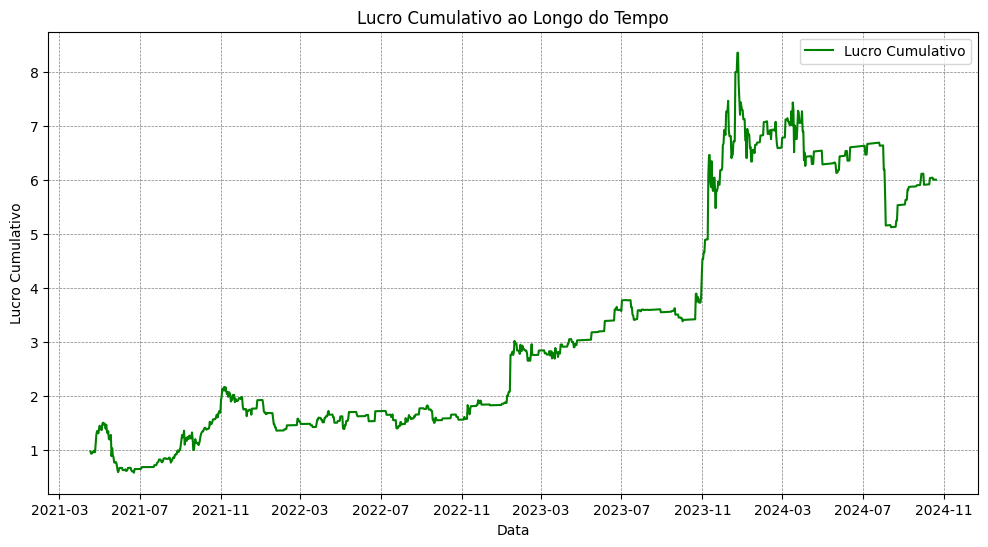

In [64]:
import matplotlib.dates as mdates
df_profit.index = pd.to_datetime(df_profit.index)
# Calcula o produto cumulativo dos valores na coluna de lucro
df_profit['cumulative_profit'] = df_profit[0].cumprod()

# Define o tamanho do gráfico (opcional)
plt.figure(figsize=(12, 6))

# Plota a série temporal do lucro cumulativo
plt.plot(df_profit.index, df_profit['cumulative_profit'], label="Lucro Cumulativo", color='green')
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=4))  # Exibe uma data por mês
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))  # Exibe no formato Ano-Mês
# Personaliza o gráfico
plt.title("Lucro Cumulativo ao Longo do Tempo")
plt.xlabel("Data")
plt.ylabel("Lucro Cumulativo")
plt.legend()
plt.grid(True, which='both', linestyle='--', linewidth=0.5, color='gray')  # `which='both'` adiciona a grade principal 
#plt.savefig("lucro_cumulativo_ajustado_22-07-02_com_restricao.png", format="png", dpi=300, bbox_inches="tight")  # Salva em alta resolução com bordas ajustadas
# Exibe o gráfico
plt.show()



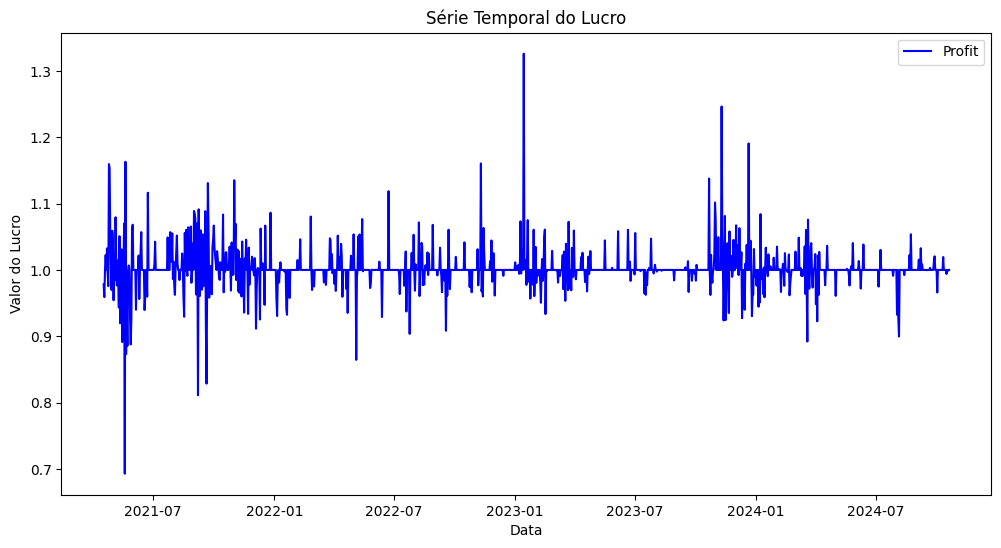

In [65]:
# Define o tamanho do gráfico (opcional)
plt.figure(figsize=(12, 6))

# Plota a série temporal
plt.plot(df_profit.index, df_profit[0], label="Profit", color='blue')

# Personaliza o gráfico
plt.title("Série Temporal do Lucro")
plt.xlabel("Data")
plt.ylabel("Valor do Lucro")
plt.legend()
#plt.savefig("lucro_serie_temporal.png", format="png", dpi=300, bbox_inches="tight")  # Salva em alta resolução com bordas ajustadas
# Exibe o gráfico
plt.show()

In [66]:
df_profit = df_profit.rename(columns={0: "profit"})

In [67]:
df_profit

,profit,cumulative_profit
2021-04-17,0.978243,0.978243
2021-04-18,0.959289,0.938417
2021-04-19,1.000200,0.938605
2021-04-20,1.022572,0.959791
2021-04-21,1.000200,0.959983
...,...,...
2024-10-16,0.994209,6.012042
2024-10-17,1.000200,6.013245
2024-10-18,1.000200,6.014448
2024-10-19,0.999178,6.009504


In [68]:
df_profit.to_csv("df_profit_1.csv")